# T2.1 - MODELOS DE REGRESSÃO LINEAR

## Integrantes:

* Giulia Duncan Coutinho - 1410398
* Matheus Falcão - 1410962
* Igor Vieira - 1410492

Utilizando o dataset1.csv em anexo, criem alguns modelos de regressão linear (variando as features) para tentar prever a variável target. Avaliem cada modelo individualmente e, ao final, façam uma análise comparativa dos modelos, discutam os resultados e escolham e justifiquem qual foi o melhor modelo obtido.

## SETUP

In [1]:
from IPython.display import display, Markdown, Latex
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import operator
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
import random

# Seed

In [2]:
seed = 1289302
random.seed(seed)

## Dataset

In [3]:
dataset1 = pd.read_csv('dataset1.csv')

In [4]:
dataset1.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,target
0,18.0,0,6.575,4.0900,296,396.90,0.00632,2.31,0.538,65.2,1,15.3,4.98,24.0
1,0.0,0,6.421,4.9671,242,396.90,0.02731,7.07,0.469,78.9,2,17.8,9.14,21.6
2,0.0,0,7.185,4.9671,242,392.83,0.02729,7.07,0.469,61.1,2,17.8,4.03,34.7
3,0.0,0,6.998,6.0622,222,394.63,0.03237,2.18,0.458,45.8,3,18.7,2.94,33.4
4,0.0,0,7.147,6.0622,222,396.90,0.06905,2.18,0.458,54.2,3,18.7,5.33,36.2
5,0.0,0,6.430,6.0622,222,394.12,0.02985,2.18,0.458,58.7,3,18.7,5.21,28.7
6,12.5,0,6.012,5.5605,311,395.60,0.08829,7.87,0.524,66.6,5,15.2,12.43,22.9
7,12.5,0,6.172,5.9505,311,396.90,0.14455,7.87,0.524,96.1,5,15.2,19.15,27.1
8,12.5,0,5.631,6.0821,311,386.63,0.21124,7.87,0.524,100.0,5,15.2,29.93,16.5
9,12.5,0,6.004,6.5921,311,386.71,0.17004,7.87,0.524,85.9,5,15.2,17.10,18.9


In [5]:
dataset1.dtypes

V1        float64
V2          int64
V3        float64
V4        float64
V5          int64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11         int64
V12       float64
V13       float64
target    float64
dtype: object

# Analisando dados

In [6]:
y = dataset1['target'].values
X = dataset1.drop('target', axis= 1)

In [7]:
dataset1['target'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: target, dtype: float64

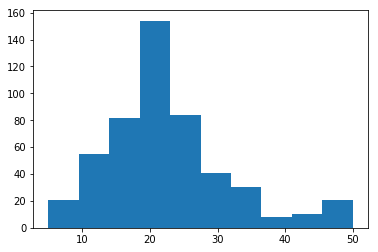

In [8]:
plt.hist(dataset1['target'])
plt.show()

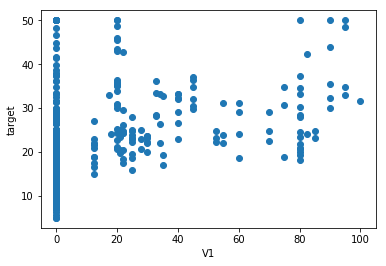

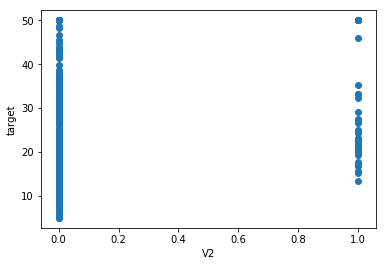

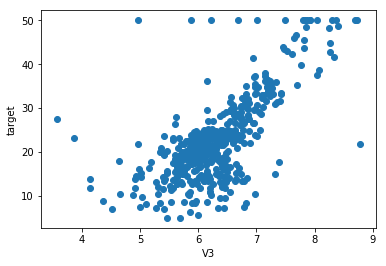

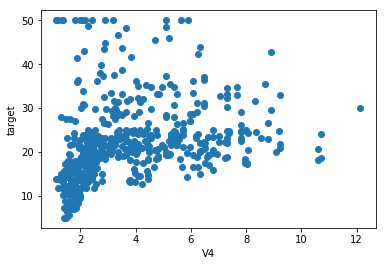

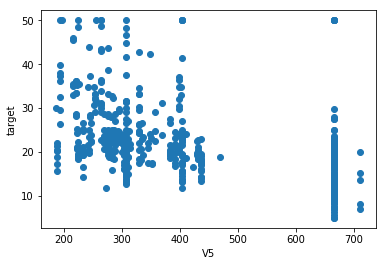

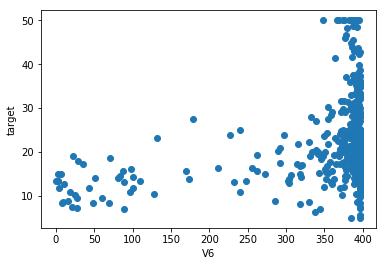

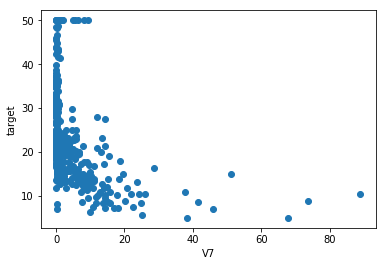

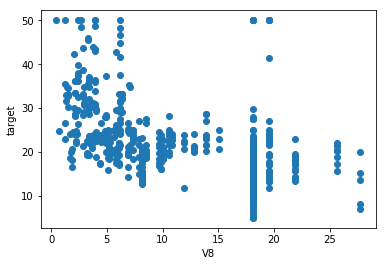

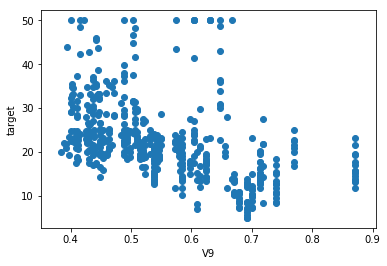

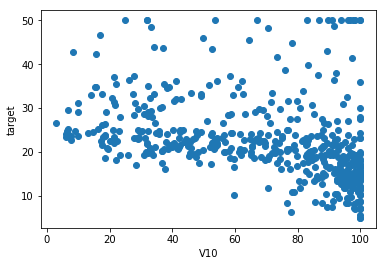

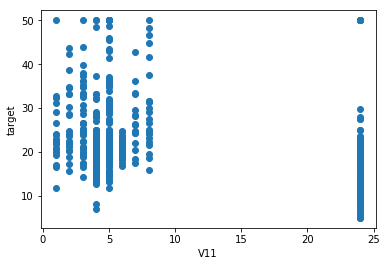

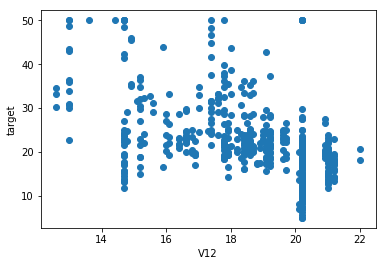

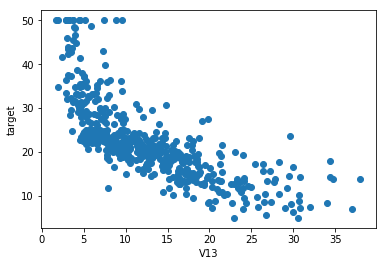

In [9]:
for i in range(1, 14):
    var = 'V' + str(i)
    plt.scatter(X[var], y)
    plt.xlabel(var)
    plt.ylabel("target")
    plt.show()

Os modelos mais promissores parecem: V1, V3, V9, V10, V13 olhando de forma bem crua

## Separando dados de treino e de teste (20% de teste)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=seed)

In [11]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
413,0.0,0,5.155,1.5894,666,210.97,28.65580,18.10,0.597,100.0,24,20.2,20.08
163,0.0,1,8.375,2.1620,403,388.45,1.51902,19.58,0.605,93.9,5,14.7,3.32
420,0.0,0,6.411,1.8589,666,318.75,11.08740,18.10,0.718,100.0,24,20.2,15.02
450,0.0,0,6.749,2.3236,666,0.32,6.71772,18.10,0.713,92.6,24,20.2,17.44
177,0.0,0,6.315,3.3175,296,395.60,0.05425,4.05,0.510,73.4,5,16.6,6.29


In [12]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
147,0.0,0,4.926,1.4608,403,391.71,2.36862,19.58,0.8710,95.7,5,14.7,29.53
424,0.0,0,5.565,2.0635,666,3.65,8.79212,18.10,0.5840,70.6,24,20.2,17.16
93,28.0,0,6.211,3.6659,270,396.33,0.02875,15.04,0.4640,28.9,4,18.2,6.21
332,35.0,0,6.031,6.6407,304,362.25,0.03466,6.06,0.4379,23.3,1,16.9,7.83
164,0.0,0,5.854,2.4220,403,395.11,2.24236,19.58,0.6050,91.8,5,14.7,11.64


# Usando todas as features

In [13]:
comparativo = pd.DataFrame(columns=['features', 'score', 'erro quadratico'])

In [14]:
# Variavel alvo
y_v = y_train
# Variavel preditora
x_v = X_train

# Modelo
reg = LinearRegression()
reg.fit(x_v, y_v)

# Score
score_train = reg.score(x_v, y_v)
print('Score (R2) encontrada nos dados de treino:', '{:6.4f}'.format(score_train))

# Coef
print('Coeficientes:', reg.coef_)

# erro quadrático médio
erro = np.mean((reg.predict(X_test) - y_test) ** 2)
print('Erro quadrático médio:', erro)

# comparativo
temp = pd.DataFrame([['Todas', score_train, erro]], columns=['features', 'score', 'erro quadratico'])
comparativo = comparativo.append(temp, ignore_index=True)

Score (R2) encontrada nos dados de treino: 0.7621
Coeficientes: [ 4.23197908e-02  3.27922020e+00  4.34930738e+00 -1.26158178e+00
 -1.21619245e-02  8.46762558e-03 -9.24864691e-02  6.76479157e-02
 -1.62273292e+01  3.29352708e-03  2.73886938e-01 -9.21060452e-01
 -5.26899542e-01]
Erro quadrático médio: 29.953665487707998


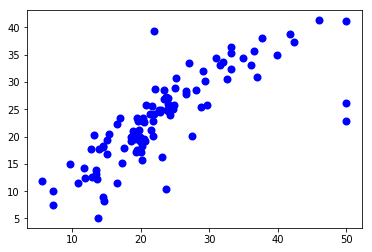

In [15]:
plt.scatter(y_test, reg.predict(X_test), color='blue', linewidth=2)
plt.show()

# Cada feature

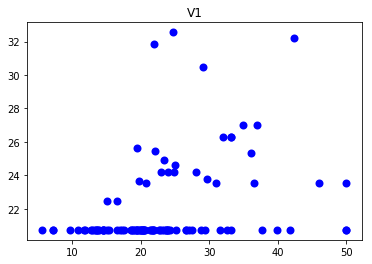

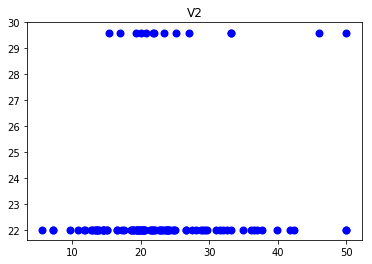

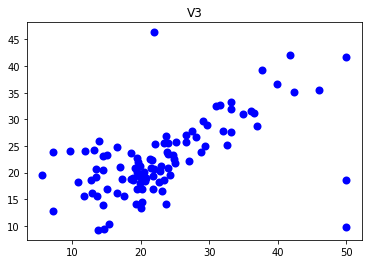

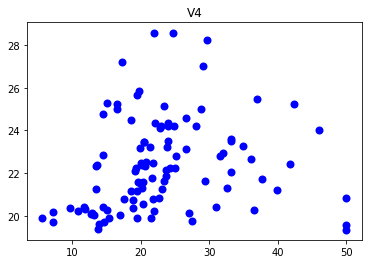

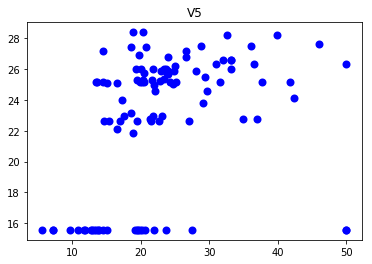

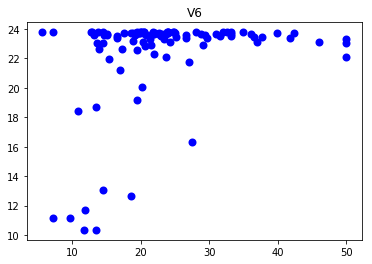

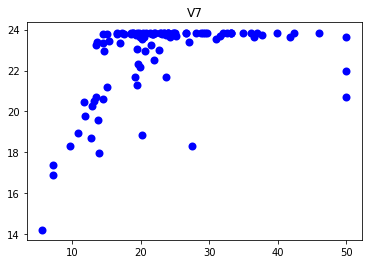

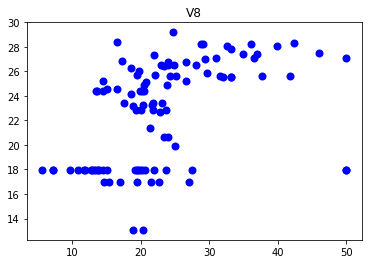

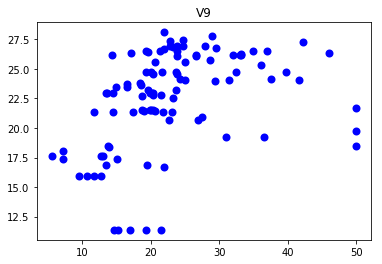

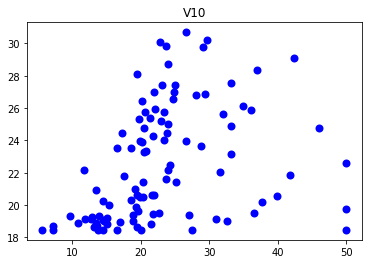

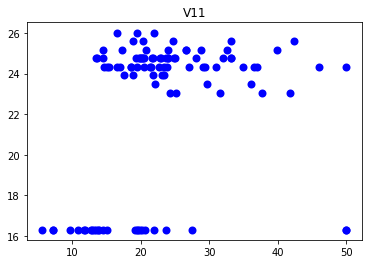

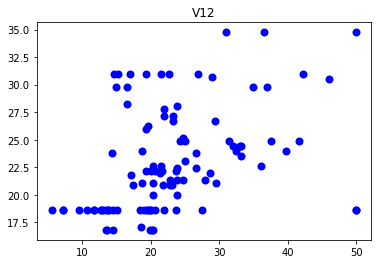

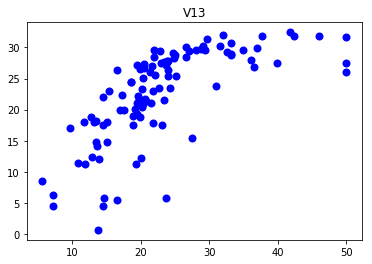

In [16]:
for i in range(1, 14):
    # Feature
    f ='V' + str(i)

    # Variavel alvo
    y_v = y_train
    # Variavel preditora
    x_v = X_train[f].values.reshape(-1, 1)

    # Modelo
    reg = LinearRegression()
    reg.fit(x_v, y_v)

    # Comparativo
    score_train = reg.score(x_v, y_v)
    erro = np.mean((reg.predict(X_test[f].values.reshape(-1, 1)) - y_test) ** 2)
    
    temp = pd.DataFrame([[f, score_train, erro]], columns=['features', 'score', 'erro quadratico'])
    comparativo = comparativo.append(temp, ignore_index=True)
    
    # Plot
    plt.scatter(y_test, reg.predict(X_test[f].values.reshape(-1, 1)), color='blue', linewidth=2)
    plt.title(f)
    plt.show()

In [17]:
comparativo

,features,score,erro quadratico
0,Todas,0.762089,29.953665
1,V1,0.134206,74.915748
2,V2,0.033733,83.113636
3,V3,0.525085,57.967467
4,V4,0.071928,82.243887
5,V5,0.240768,73.014689
6,V6,0.112677,75.423558
7,V7,0.151131,71.954114
8,V8,0.238282,65.953953
9,V9,0.191412,71.887984


Os melhores scores foram de V3 e V13

# V3 & V13

In [18]:
# Variavel alvo
y_v = y_train
# Variavel preditora
x_v = pd.DataFrame()
x_v['V3'] = X_train['V3']
x_v['V12'] = X_train['V12']
x_v['V13'] = X_train['V13']

# Modelo
reg = LinearRegression()
reg.fit(x_v, y_v)

# Score
score_train = reg.score(x_v, y_v)
print('Score (R2) encontrada nos dados de treino:', '{:6.4f}'.format(score_train))

# Coef
print('Coeficientes:', reg.coef_)

# erro quadrático médio
x_test = pd.DataFrame()
x_test['V3'] = X_test['V3']
x_test['V12'] = X_test['V12']
x_test['V13'] = X_test['V13']
erro = np.mean((reg.predict(x_test) - y_test) ** 2)
print('Erro quadrático médio:', erro)

# comparativo
temp = pd.DataFrame([['V3 V12 V13', score_train, erro]], columns=['features', 'score', 'erro quadratico'])
comparativo = comparativo.append(temp, ignore_index=True)

Score (R2) encontrada nos dados de treino: 0.7108
Coeficientes: [ 5.00137568 -0.92050323 -0.56003507]
Erro quadrático médio: 38.267666032041184


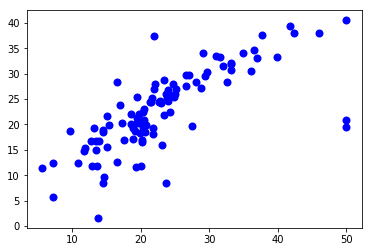

In [19]:
plt.scatter(y_test, reg.predict(x_test), color='blue', linewidth=2)
plt.show()

In [20]:
comparativo.sort_values(by=['score'])

,features,score,erro quadratico
2,V2,0.033733,83.113636
4,V4,0.071928,82.243887
6,V6,0.112677,75.423558
1,V1,0.134206,74.915748
10,V10,0.148274,74.370931
7,V7,0.151131,71.954114
11,V11,0.160729,77.189866
9,V9,0.191412,71.887984
8,V8,0.238282,65.953953
5,V5,0.240768,73.014689
